## 분류 모형 87p
- 대출 심사
- 코로나 음성/양성

In [2]:
from sklearn.datasets import load_iris                    # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier           #의사 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split      # 훈련 데이터 / 테스트 데이터 분리하는 함수

iris = load_iris()
iris_data = iris.data     # 독립변수
iris_label = iris.target  # 종속변수

print('iris target', iris_label)

print('iris target 명', iris.target_names)

iris target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 ['setosa' 'versicolor' 'virginica']


In [5]:
import pandas as pd
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   label  
0      0  
1      0  
2      0

레이블이 0 부터 시작해서 s ve vir 이므로 0,1,2   
# 0 : setosa, 1 : versicolor, 2: virginica 품종으로 구성


In [6]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data,    # 독립변수
    iris_label,   # 종속변수
    test_size=0.2,
    random_state = 11 # 숫자는 큰 의미가 없고, 반복시행되어도 고정되도록 하는 옵션
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape   # 위의 코드 작성 후에 확인하는 습관

((120, 4), (30, 4), (120,), (30,))

## 모형 학습 코드

In [8]:
# DecisionTreeClassifier 객체 생성(하나의 알고리즘임)

dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

## 모형 예측

In [11]:
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

## 모형 평가

In [14]:
from sklearn.metrics import accuracy_score
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


교차 검증 : 데이터가 적을 때 사용!
- 고객사에서 요청하는 것은 천만명의 모집단
- 데이터 수집은 1000명 정도
- 고객이 우리 제품을 구매할지 안할지 예측.
- 800명 훈련데이터, 200명 테스트 데이터 분리
- 샘플링 이슈가 발생 = 구매를 할 사람들이 800명/ 안할 사람이 200명 => 여기서 안할 사람에서 180명을 뽑는다면..?!     
==> 다만 이러한 시행을 반복했을 때의 반복한 평균 정확도를 구하는 것이 \~~~ 교차 검증.

# K폴드

- 데이터 불러오기

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=11)

print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


### KFold 코드

In [16]:
kfold = KFold(n_splits=5)  #5개의 폴드 데이터 생성(k=임의의 수)
cv_accuracy = []
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):

  X_train, X_test = features[train_index], features[test_index] # 독립변수
  y_train, y_test = label[train_index], label[test_index] # 종속변수

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  n_iter += 1

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
  cv_accuracy.append(accuracy)

print("\n## 평균 검증 정확도", np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 0.9200000000000002


## Stratified K 폴드
- 층화추출에서 유래

* 층화 추출 (여론조사 지역별 비율대로 응답 수 확보하는?)

- 분류모델에서는 Stratified K 폴드 꼭 써야 함
- 이유 :
  - 범주 예측 (100건 연체, 9900건 정상 납부인 상황일 때)
  - 훈련데이터 / 테스트를 분리
  => 훈련데이터가 99건 연체 / 6901건 정상 납부
  => 테스트데이터가 1건 연체 / 나머지 정상인 상황이면??
  샘플링 오류 심각.

In [17]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [18]:
kfold = KFold(n_splits=3)
# 폴드 세트를 3번 반복한다.

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


위 코드 => KFold의 문제를 극단적 사례로 ..

아래 StratifiedKFold로 이를 해결

In [25]:
from sklearn.model_selection import StratifiedKFold
kfold = KFold(n_splits=3)
# 폴드 세트를 3번 반복한다.

skf = StratifiedKFold(n_splits=3)
n_iter = 0
for train_index, test_index in skf.split(iris_df,iris_df['label']):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


## 모형 학습 및 예측 평가 108

In [20]:
dt_clf = DecisionTreeClassifier(random_state=11)
skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    # print(train_index,test_index) 균일하게 잘 분배되었는지(skfold)확인
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 마다 정확도 측정
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
            .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))



#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.92 0.98]
## 평균 검증 정확도: 0.96


sttratified K 폴드
- 모형이 보다 안정적으로 변함(예측치의 편차가 작아짐)


- cross_val_score()
  : 반복문 코드를 줄여준다~

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf =DecisionTreeClassifier(random_state=11)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print("교차 검증별 정확도", np.round(scores,4))
print("평균 검증 정확도:", np.round(np.mean(scores),4))

교차 검증별 정확도 [0.98 0.92 0.98]
평균 검증 정확도: 0.96


## GridSearchCV


0.6333333333333333


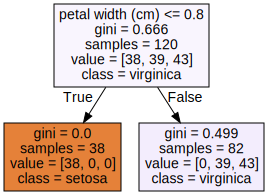

In [22]:
from sklearn.datasets import load_iris               # 예제 데이터 불러오기
from sklearn.tree import DecisionTreeClassifier      # 결정트리 머신러닝 알고리즘 중 하나
from sklearn.model_selection import train_test_split # 훈련 데이터 / 테스트 데이터
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

iris = load_iris()
iris_data = iris.data  # 독립변수
iris_label = iris.target # 종속변수

# 0은 setosa, 1은 versicolor 2는 virginica 품종으로 구분
X_train, X_test, y_train, y_test = train_test_split(
    iris_data     # 독립변수
    , iris_label # 종속변수
    , test_size=0.2
    , random_state=2023
)

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 1) # maxdepth 질문의 개수라고 생각해보자

# 학습 수행
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names= iris.feature_names, impurity=True, filled=True)
pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, pred))

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


- 사견: RandomSearch, GridSearch
=> 그러나 결론부터 말하면, RandomSearch를 많이 쓰게 된다.